In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

ccy = pd.read_csv('../ccy1996_to_2023.csv')
ccy.set_index('Date', inplace=True)

# filter data start from 2002, as it is the end of a bear market
ccy_r = ccy[313:].pct_change().dropna()
# ccy_r = ccy.pct_change().dropna()
ccy_r.head()

,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,JPY=,AUDNZD=R,EURAUD=R,GBPAUD=R,...,EURGBP=R,EURCAD=R,EURCHF=R,EURJPY=R,GBPCAD=R,GBPCHF=R,GBPJPY=R,CADCHF=R,CADJPY=R,CHFJPY=R
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-11,-0.000192,-0.013731,-0.002570,0.002179,0.001129,0.002543,0.008860,0.013666,-0.002790,0.002196,...,-0.004604,-0.001926,-0.000507,0.006187,0.003165,0.003601,0.011095,0.000435,0.007674,0.007443
2002-01-18,-0.011052,-0.001062,-0.009354,-0.008074,0.011148,0.003804,0.003558,-0.009979,0.001545,0.003412,...,-0.001461,0.001860,-0.005582,-0.006106,0.002939,-0.003234,-0.004441,-0.006130,-0.007857,-0.001628
2002-01-25,0.003596,0.002244,-0.020581,-0.019306,-0.002539,0.024603,0.013731,0.001358,-0.023893,-0.022766,...,-0.001463,-0.023289,0.003743,-0.007040,-0.021806,0.005002,-0.005878,0.027389,0.016447,-0.010662
2002-02-01,-0.013750,-0.015202,-0.004561,0.005711,-0.012419,0.006429,-0.009638,0.001479,0.009779,0.019670,...,-0.009848,-0.016422,0.002135,-0.013535,-0.006719,0.012121,-0.003379,0.019096,0.003476,-0.015214
2002-02-08,0.002553,0.000718,0.013107,-0.001658,0.004779,-0.014904,0.011798,0.001846,0.010157,-0.004185,...,0.014713,0.017535,-0.001996,0.024654,0.003127,-0.016235,0.009535,-0.019341,0.006450,0.026135


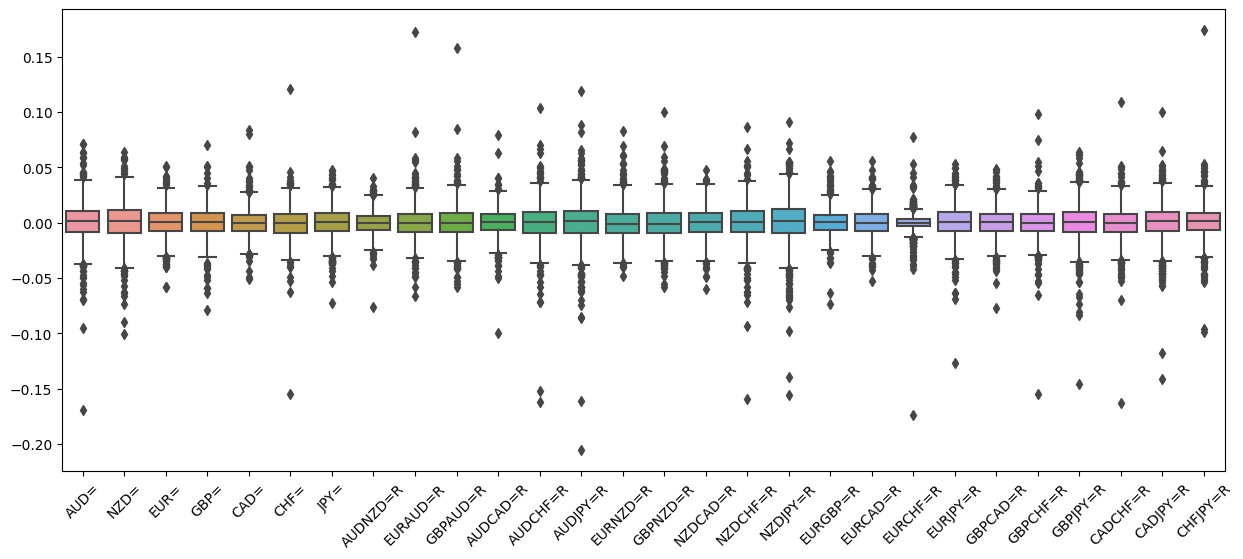

In [2]:
plt.figure(figsize=(15,6))
sns.boxplot(data=ccy_r)
plt.xticks(rotation = 45)
plt.show()

In [3]:
ave_weekly = ccy_r.mean(axis=0)

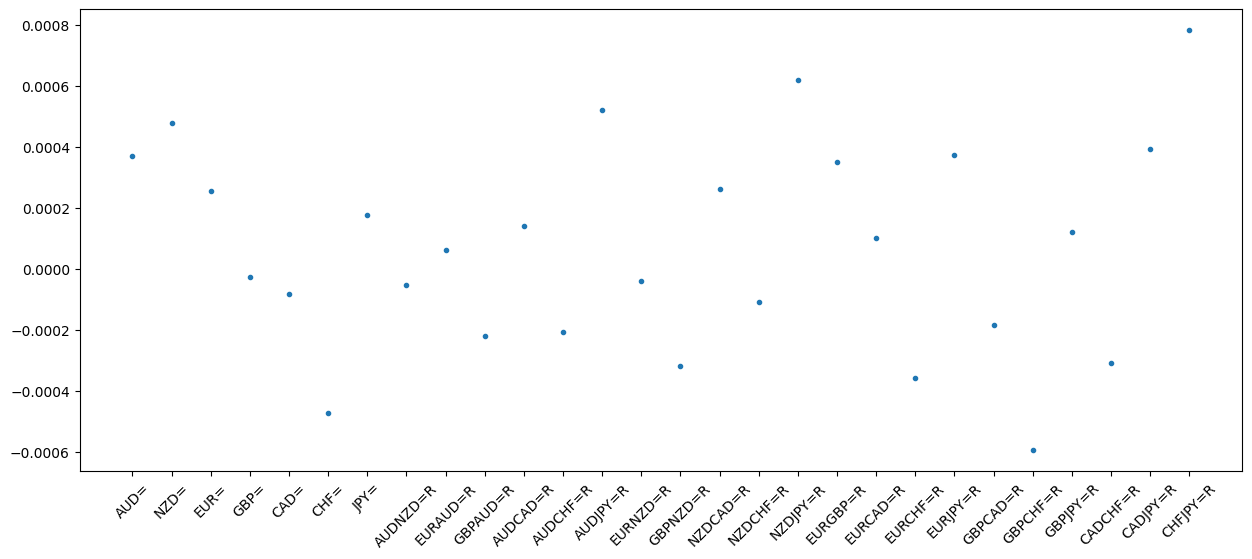

In [4]:
plt.figure(figsize=(15,6))
plt.plot(ave_weekly, marker='.',linestyle='None')
plt.xticks(rotation = 45)
plt.show()

In [5]:
df = pd.DataFrame(ave_weekly)

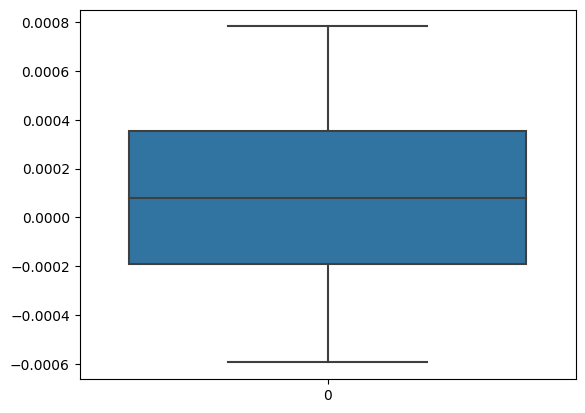

In [6]:
sns.boxplot(data=df)
plt.show()

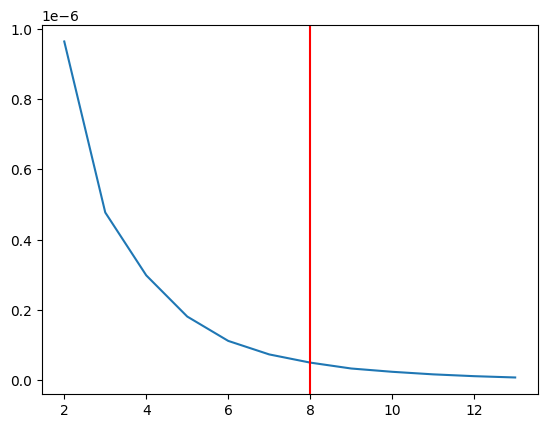

In [7]:
SSE = []
for k in range(2,14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
    
plt.plot(range(2,14),SSE)
plt.axvline(x=8, c="r")

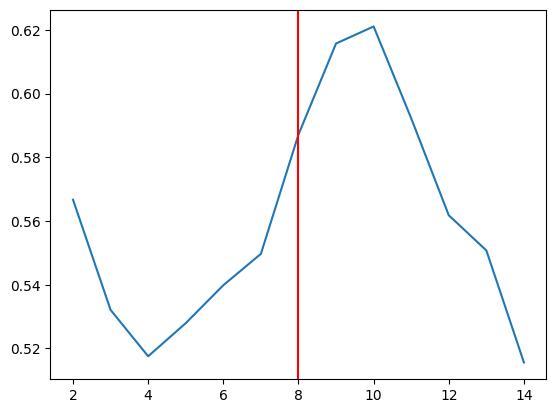

In [8]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
silhouette_avg = []
for n in clusters_range:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df, labels))
    
plt.plot(clusters_range, silhouette_avg)
plt.axvline(x=8, c="r")

In [9]:
chart = pd.DataFrame(ave_weekly)
chart.reset_index(inplace=True)
chart.rename(columns={'index':'ccy',
                  0:'average_return'}, inplace=True)

In [10]:
chart.head()

,ccy,average_return
0,AUD=,0.000370
1,NZD=,0.000480
2,EUR=,0.000256
3,GBP=,-0.000025
4,CAD=,-0.000081


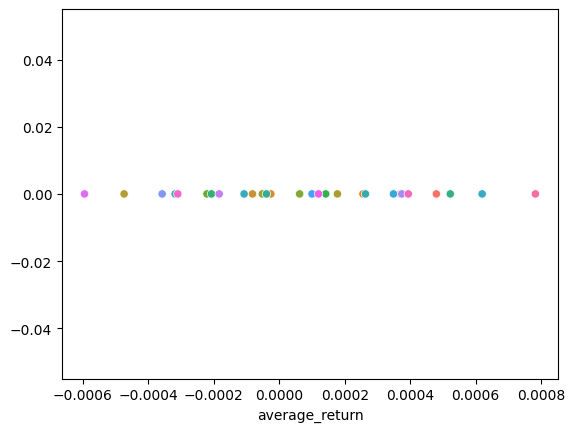

In [11]:
sns.scatterplot(data=chart, x='average_return', y=0, hue='ccy')
plt.legend().remove()
plt.show()

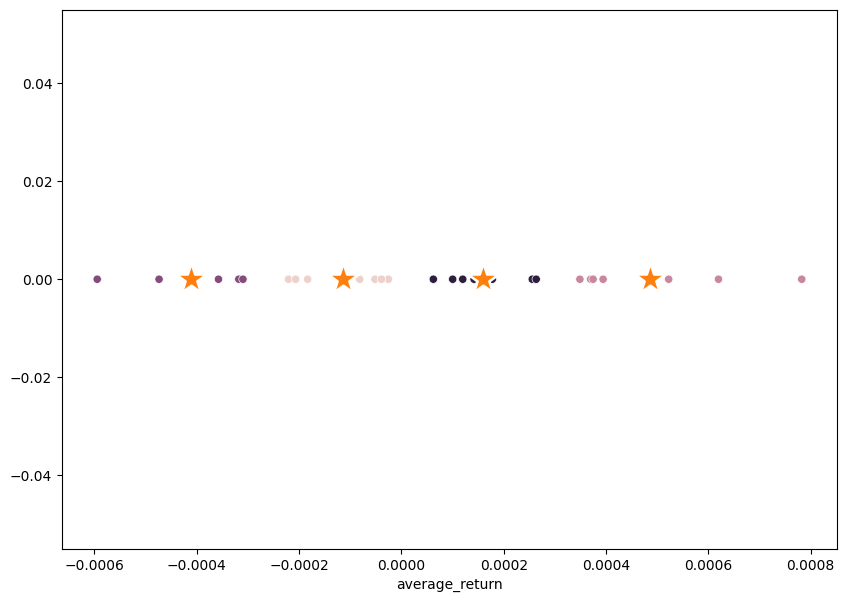

In [14]:
n_cluster = 4
km = KMeans(n_cluster, random_state=69)
km.fit(df)

chart['cluster'] = km.labels_
centroids = pd.DataFrame(km.cluster_centers_)
centroids.rename(columns={0:"centroid"}, inplace=True)

plt.figure(figsize=(10,7))
sns.scatterplot(data=chart, x='average_return', y=0, hue='cluster')
sns.scatterplot(data=centroids, x='centroid', y=0, marker="*", s=550)
plt.legend().remove()
plt.show()

In [15]:
cluster_details = [(name, cluster) for name, cluster in zip(df.index, km.labels_)]
clusters = []
for i in range (0, n_cluster):
    tmp = []
    for detail in cluster_details:
        if detail[1] == i:
            tmp.append(detail[0])
    clusters.append(tmp)
    
for i in range(len(clusters)):
    print('Cluster', i+1, 'consists of', clusters[i])

Cluster 1 consists of ['GBP=', 'CAD=', 'AUDNZD=R', 'GBPAUD=R', 'AUDCHF=R', 'EURNZD=R', 'NZDCHF=R', 'GBPCAD=R']
Cluster 2 consists of ['AUD=', 'NZD=', 'AUDJPY=R', 'NZDJPY=R', 'EURGBP=R', 'EURJPY=R', 'CADJPY=R', 'CHFJPY=R']
Cluster 3 consists of ['CHF=', 'GBPNZD=R', 'EURCHF=R', 'GBPCHF=R', 'CADCHF=R']
Cluster 4 consists of ['EUR=', 'JPY=', 'EURAUD=R', 'AUDCAD=R', 'NZDCAD=R', 'EURCAD=R', 'GBPJPY=R']
